# Ski Resorts

Data on ~500 ski resorts around the world, including details on their location, prices, slopes, lifts, and seasons, as well as a complementary table with the snow cover around the world for each month of 2022.

Data: [Download](https://maven-datasets.s3.amazonaws.com/Ski+Resorts/Ski+Resorts.zip)

Libraries used:
- pandas
- matplotlib
- seaborn
- ipywidgets
- geopandas
- scikit-learn
- folium

In [103]:
!pip install folium

## Setup

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
import folium

In [105]:
# load the data in
data_dictionary = pd.read_csv('../data/ski_resorts/data_dictionary.csv', encoding='latin-1')
resorts = pd.read_csv('../data/ski_resorts/resorts.csv', encoding='latin-1')
snow = pd.read_csv('../data/ski_resorts/snow.csv', encoding='latin-1')

In [106]:
display(data_dictionary)

,Table,Field,Description
0,Resorts,ID,Unique identifier for each resort
1,Resorts,Resort,Name of the ski & snowboard resort
2,Resorts,Latitude,Latitude for the resort's location
3,Resorts,Longitude,Longitude for the resort's location
4,Resorts,Country,Country in which the resort is located
5,Resorts,Continent,Continent in which the resort is located
6,Resorts,Price,Ski pass cost for 1 adult for 1 day in the mai...
7,Resorts,Season,Normal start and end of the ski season at the ...
8,Resorts,Highest point,Highest mountain point at the resort (meters)
9,Resorts,Lowest point,Lowest possible point to ski at the resort (me...


In [107]:
resorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   499 non-null    int64  
 1   Resort               499 non-null    object 
 2   Latitude             499 non-null    float64
 3   Longitude            499 non-null    float64
 4   Country              499 non-null    object 
 5   Continent            499 non-null    object 
 6   Price                499 non-null    int64  
 7   Season               499 non-null    object 
 8   Highest point        499 non-null    int64  
 9   Lowest point         499 non-null    int64  
 10  Beginner slopes      499 non-null    int64  
 11  Intermediate slopes  499 non-null    int64  
 12  Difficult slopes     499 non-null    int64  
 13  Total slopes         499 non-null    int64  
 14  Longest run          499 non-null    int64  
 15  Snow cannons         499 non-null    int

In [108]:
snow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      820522 non-null  object 
 1   Latitude   820522 non-null  float64
 2   Longitude  820522 non-null  float64
 3   Snow       820522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 25.0+ MB


In [109]:
display(resorts.head())

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,150,14,3,1,18,21060,Yes,Yes,Yes,No


## Analysis

### Question 1: Which countries have the most ski resorts? Are there noticeable clusters?

In [110]:
# display unique country names
resorts['Country'].unique()

# lets create a map of the country names to their iso codes
country_map = {
    'Norway': 'NOR',
    'Austria': 'AUT',
    'Canada': 'CAN',
    'New Zealand': 'NZL',
    'Chile': 'CHL',
    'Germany': 'DEU',
    'Switzerland': 'CHE',
    'Italy': 'ITA',
    'France': 'FRA',
    'United Kingdom': 'GBR',
    'United States': 'USA',
    'Andorra': 'AND',
    'Australia': 'AUS',
    'Argentina': 'ARG',
    'Finland': 'FIN',
    'Japan': 'JPN',
    'Slovenia': 'SVN',
    'Bulgaria': 'BGR',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Lebanon': 'LBN',
    'Russia': 'RUS',
    'Ukraine': 'UKR',
    'Georgia': 'GEO',
    'Serbia': 'SRB',
    'Turkey': 'TUR',
    'Slovakia': 'SVK',
    'Poland': 'POL',
    'Bosnia and Herzegovina': 'BIH',
    'Czech Republic': 'CZE',
    'Iran': 'IRN',
    'South Korea': 'KOR',
    'Romania': 'ROU',
    'Greece': 'GRC',
    'Liechtenstein': 'LIE',
    'Lithuania': 'LTU',
    'Kazakhstan': 'KAZ',
    'China': 'CHN'
}

In [111]:
resort_count_country_grouped = resorts.groupby('Country').count()['Resort'].reset_index()
resort_count_country_grouped['iso_code'] = resort_count_country_grouped['Country'].map(country_map)

# load the world map shapefile
world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\1642655922.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [112]:
# merge the data with the world map shapefile
merged = world.merge(resort_count_country_grouped, left_on='iso_a3', right_on='iso_code', how='left')

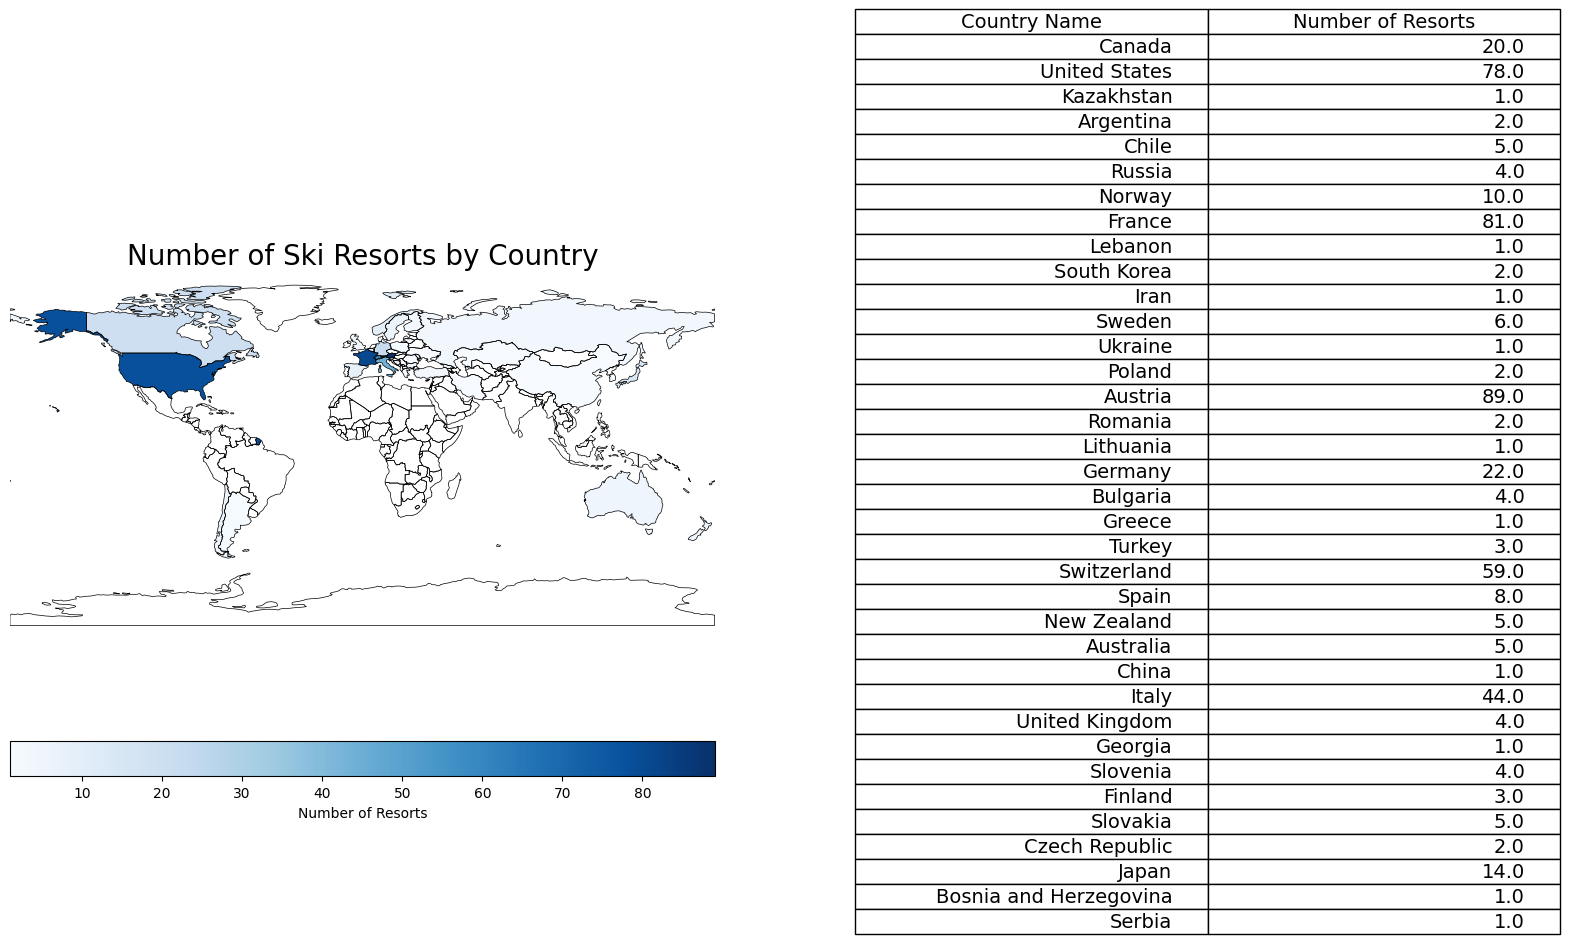

In [113]:
# now, we will plot the map. We want the colormap to be blue (duh, snow) and we want to set the color of the countries, with a label, and thick borders for the countries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Number of Ski Resorts by Country', fontsize=20)
ax1.axis('off')
ax1.set_xlim([-180, 180])
ax1.set_ylim([-90, 90])
ax1.set_aspect('equal')
ax1.set_facecolor('#fafafa')

merged.plot(column='Resort', cmap='Blues', ax=ax1, legend=True, legend_kwds={'label': 'Number of Resorts', 'orientation': 'horizontal'})

# set country borders to black and thicker
merged.boundary.plot(ax=ax1, color='black', linewidth=0.5)

# create a table
table_data = merged[['Country', 'Resort']].dropna()
table_data = table_data.rename(columns={'Country': 'Country Name', 'Resort': 'Number of Resorts'})
table = ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

# hide table axes
ax2.axis('off')

# set table font size
table.auto_set_font_size(False)
table.set_fontsize(14)

# adjust table size
table.scale(1, 1.5)




In [114]:
# now lets get clusters of resorts based on their location, lets consider within a 50mi radius as a cluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import DistanceMetric
import numpy as np

resorts['Latitude_norm'] = (resorts['Latitude'] - resorts['Latitude'].mean()) / resorts['Latitude'].std()
resorts['Longitude_norm'] = (resorts['Longitude'] - resorts['Longitude'].mean()) / resorts['Longitude'].std()

# create a distance metric
dist = DistanceMetric.get_metric('euclidean')

# create a numpy array of the lat and long
resort_locations = resorts[['Longitude_norm', 'Latitude_norm']].to_numpy()
distances = dist.pairwise(np.radians(resort_locations))

epss = 100 / 10 /  3963.2 * (180 / np.pi)
print(epss)
# create a clustering model
model = DBSCAN(eps=.005, min_samples=2, metric='precomputed')

# fit the model
model.fit(distances)

# apply the labels
resorts['cluster'] = model.labels_

# display the clusters
resorts['cluster'].value_counts()

0.1445694880729772


a:\PythonPractice\MavenAnalyticsEDA\.venv\Lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


cluster
 1    342
 2     96
 0     20
 6     17
 3      7
-1      4
 4      4
 8      4
 5      3
 7      2
Name: count, dtype: int64

In [115]:
# visualize the clusters

m = folium.Map(location=[resorts['Latitude'].mean(), resorts['Longitude'].mean()], zoom_start=2)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen']

# add the clusters to the map
for i, r in resorts.iterrows():
    cluster = r['cluster']
    color = colors[cluster % len(colors)]
    label = 'noise' if cluster == -1 else cluster
    folium.CircleMarker(location=[r['Latitude'], r['Longitude']], color=color, radius=5, fill=True).add_to(m)

m
    

The countries with the most ski resorts are Austria, France, United States, Switzerland, and Italy. There are noticeable clusters in Europe and North America, but primarily centered around the Alps and the Western United States\Southwestern Canada.

### Question 2: How do ski seasons vary by location? Does the snow cover reflect this?

In [116]:
seasons_df_pre_join = resorts[['ID', 'Resort', 'Season', 'Latitude', 'Longitude']]

In [117]:
display(seasons_df_pre_join.head())

,ID,Resort,Season,Latitude,Longitude
0,1,Hemsedal,November - May,60.928244,8.383487
1,2,Geilosiden Geilo,November - April,60.534526,8.206372
2,3,Golm,December - April,47.057810,9.828167
3,4,Red Mountain Resort-Rossland,December - April,49.105520,-117.846280
4,5,Hafjell,November - April,61.230369,10.529014


In [118]:
display(snow.head())

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.28
1,2022-12-01,63.125,69.125,100.00
2,2022-12-01,63.125,69.375,100.00
3,2022-12-01,63.125,69.625,100.00
4,2022-12-01,63.125,69.875,100.00


In [119]:
# alright, we want to join the two dataframes together, but we need to do some preprocessing first
def split_season(season):
    try:
        start, end = season.split('-')
        return start, end
    except:
        try:
            start = season.split('-')[0]
            end = season.split('-')[1]
            return start, end
        except:
            start = season.split('-')[0]
            return start, start
        
# first, we need to get the season start and end months into their own columns
seasons_df_pre_join['Season Start'], seasons_df_pre_join['Season End'] = zip(*seasons_df_pre_join['Season'].map(split_season))

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\1746264222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'], seasons_df_pre_join['Season End'] = zip(*seasons_df_pre_join['Season'].map(split_season))
C:\Users\khari\AppData\Local\Temp\ipykernel_38236\1746264222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'], seasons_df_pre_join['Season End'] = zip(*seasons_df_pre_join['Season'].map(split_season))


In [120]:
display(seasons_df_pre_join.head())

,ID,Resort,Season,Latitude,Longitude,Season Start,Season End
0,1,Hemsedal,November - May,60.928244,8.383487,November,May
1,2,Geilosiden Geilo,November - April,60.534526,8.206372,November,April
2,3,Golm,December - April,47.057810,9.828167,December,April
3,4,Red Mountain Resort-Rossland,December - April,49.105520,-117.846280,December,April
4,5,Hafjell,November - April,61.230369,10.529014,November,April


In [125]:
# display all unique values for season start and end
print(seasons_df_pre_join['Season Start'].unique())

['November ' 'December ' 'June ' 'Year' 'October ' 'September ' 'July '
 'May ' 'July' 'April' 'Unknown' 'May' 'March' 'December']


In [128]:
print(seasons_df_pre_join['Season End'].unique())

[' May' ' April' ' September' ' October' 'round' ' June' ' March' ' June '
 'July' 'April' 'Unknown' 'May' 'March' 'December' ' December ']


In [127]:
# there are still some weird values in there, lets fix them
# we need to split tuples in the column, so lets take the 2nd value if there is a comma, meaning we will take the latest possible season end
seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].apply(lambda x: x.split(',')[1] if ',' in x else x)

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\3160640119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].apply(lambda x: x.split(',')[1] if ',' in x else x)


In [129]:
# lets see the mode of the season start and end to replace unknown values
print(seasons_df_pre_join['Season Start'].mode())
print(seasons_df_pre_join['Season End'].mode())

0    December 
Name: Season Start, dtype: object
0     April
Name: Season End, dtype: object


In [130]:
seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].replace('Unknown', 'December')
seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].replace('Unknown', 'April')

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2398850269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].replace('Unknown', 'December')
C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2398850269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].replace('Unknown', 'April')


In [131]:
# next, lets replace 'Year' in the start column to be January, and when the end column is 'round' we will replace it with December

seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].replace('Year', 'January')
seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].replace('round', 'December')

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\1025636021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].replace('Year', 'January')
C:\Users\khari\AppData\Local\Temp\ipykernel_38236\1025636021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].replace('round', 'December')


In [132]:
# now, we need to convert the month names to 'yyyy-mm-dd' format, the months are in their string representation
import calendar

def month_name_to_num(month: str) -> int:
    # strip all whitespace
    month = month.strip()
    return list(calendar.month_name).index(month)

seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].apply(month_name_to_num)
seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].apply(month_name_to_num)

display(seasons_df_pre_join.head())

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2753625789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'] = seasons_df_pre_join['Season Start'].apply(month_name_to_num)
C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2753625789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season End'] = seasons_df_pre_join['Season End'].apply(month_name_to_num)


,ID,Resort,Season,Latitude,Longitude,Season Start,Season End
0,1,Hemsedal,November - May,60.928244,8.383487,11,5
1,2,Geilosiden Geilo,November - April,60.534526,8.206372,11,4
2,3,Golm,December - April,47.057810,9.828167,12,4
3,4,Red Mountain Resort-Rossland,December - April,49.105520,-117.846280,12,4
4,5,Hafjell,November - April,61.230369,10.529014,11,4


In [133]:
# now, lets create date objects for the season start and end column so we can join with the snow dataframe.
# for this, the data is all from 2022, so we will input 2022 as the year

seasons_df_pre_join['Season Start'] = pd.to_datetime('2022-' + seasons_df_pre_join['Season Start'].astype(str) + '-01')
seasons_df_pre_join['Season End'] = pd.to_datetime('2022-' + seasons_df_pre_join['Season End'].astype(str) + '-01')

display(seasons_df_pre_join.head())

C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2214035876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season Start'] = pd.to_datetime('2022-' + seasons_df_pre_join['Season Start'].astype(str) + '-01')
C:\Users\khari\AppData\Local\Temp\ipykernel_38236\2214035876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df_pre_join['Season End'] = pd.to_datetime('2022-' + seasons_df_pre_join['Season End'].astype(str) + '-01')


,ID,Resort,Season,Latitude,Longitude,Season Start,Season End
0,1,Hemsedal,November - May,60.928244,8.383487,2022-11-01,2022-05-01
1,2,Geilosiden Geilo,November - April,60.534526,8.206372,2022-11-01,2022-04-01
2,3,Golm,December - April,47.057810,9.828167,2022-12-01,2022-04-01
3,4,Red Mountain Resort-Rossland,December - April,49.105520,-117.846280,2022-12-01,2022-04-01
4,5,Hafjell,November - April,61.230369,10.529014,2022-11-01,2022-04-01


In [134]:
display(snow.head())

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.28
1,2022-12-01,63.125,69.125,100.00
2,2022-12-01,63.125,69.375,100.00
3,2022-12-01,63.125,69.625,100.00
4,2022-12-01,63.125,69.875,100.00


In [136]:
snow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      820522 non-null  object 
 1   Latitude   820522 non-null  float64
 2   Longitude  820522 non-null  float64
 3   Snow       820522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 25.0+ MB


In [137]:
# convert month in the snow dataframe to a datetime object
snow['Month'] = pd.to_datetime(snow['Month'])

In [138]:
# we want to get the snow fall for each month in between the season start and end dates as a column in the dataframe, and then an average of those values as another column

# first, lets see if we can join the df on lat, lng, and month to see if we need to do any further preprocessing on the lat/lng columns
# since the month and season_start cols are in the same format, we can join directly

joined_test = snow.merge(seasons_df_pre_join, left_on=['Latitude', 'Longitude', 'Month'], right_on=['Latitude', 'Longitude', 'Season Start'], how='left')

,Month,Latitude,Longitude,Snow,ID,Resort,Season,Season Start,Season End
0,2022-12-01,63.125,68.875,95.28,NaN,NaN,NaN,NaT,NaT
1,2022-12-01,63.125,69.125,100.00,NaN,NaN,NaN,NaT,NaT
2,2022-12-01,63.125,69.375,100.00,NaN,NaN,NaN,NaT,NaT
3,2022-12-01,63.125,69.625,100.00,NaN,NaN,NaN,NaT,NaT
4,2022-12-01,63.125,69.875,100.00,NaN,NaN,NaN,NaT,NaT


In [141]:
# okay so we weren't able to join directly on the lat/lng, so lets fuzzy join on the lat/lng - within 1 degree of each other
# we will use the fuzzywuzzy library to do this
from fuzzywuzzy import fuzz
from itertools import product
import typing

def fuzzy_join(df1: pd.DataFrame, df2: pd.DataFrame, left_on: typing.List[str], right_on: typing.List[str], threshold: typing.Union[int, float]=90):
    # create a cartesian product of the two dataframes
    cartesian = list(product(df1.index, df2.index))

    # calculate the similarity between the lat/lng values
    similarities = [(i, j, fuzz.token_set_ratio(df1.loc[i, left_on] + ',' + df1.loc[i, right_on], df2.loc[j, left_on] + ',' + df2.loc[j, right_on])) for i, j in cartesian]

    # filter the pairs of rows that have a similarity greater than the threshold
    matches = [(i, j, score) for i, j, score in similarities if score >= threshold]

    # create a dataframe of the matches
    matches_df = pd.DataFrame(matches, columns=['df1_index', 'df2_index', 'score'])

    # merge the original dataframes on the two matched indices
    merged = df1.merge(matches_df, left_index=True, right_on='df1_index', how='left')
    merged = merged.merge(df2, left_on='df2_index', right_index=True, how='left')

    return merged

a:\PythonPractice\MavenAnalyticsEDA\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [143]:
merged = fuzzy_join(snow, seasons_df_pre_join.astype({'Latitude': 'float64', 'Longitude': 'float64'}), ['Latitude', 'Longitude'], ['Latitude', 'Longitude'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None